In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/houses_dataset_normalized.csv")

In [4]:
# creation des matrices
X_train = np.array(df[["surface", "chambres", "age"]])
Y_train = np.array(df["prix"])

In [9]:
# parametres
w = np.random.random(4)
rate = 0.01

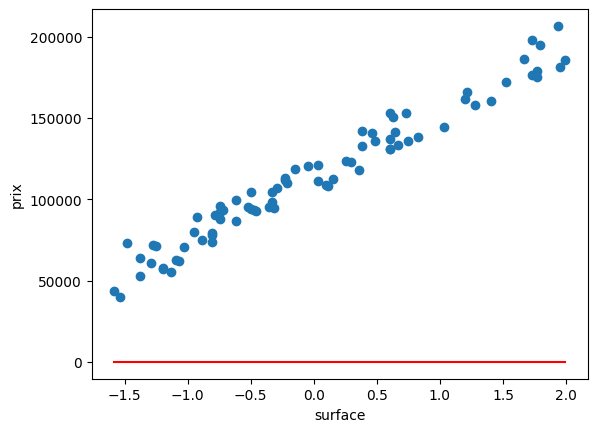

In [10]:
# visualisation du modele de base
plt.scatter(df["surface"].values, df["prix"].values)

# droite de regression
x_line = np.linspace(df["surface"].min(), df["surface"].max(), 100)

X_line = np.zeros((100, 4))
X_line[:,0] = x_line
X_line[:,1] = df["chambres"].mean()
X_line[:,2] = df["age"].mean()
X_line[:,3] = 1

y_line = X_line @ w

plt.plot(x_line, y_line, "red")

plt.xlabel("surface")
plt.ylabel("prix")
plt.show()

In [11]:
# size
m, n = X_train.shape

# ajouts du biais au features
X_b = np.c_[X_train, np.ones(m)]

# gradient
for _ in range(1000):
    y_pred = X_b @ w
    grad = (2/m) * X_b.T @ (y_pred - Y_train)
    w -= rate * grad


In [12]:
Weight = pd.DataFrame(w)

# save params
Weight.to_json("weight.json", index=False, indent=True)

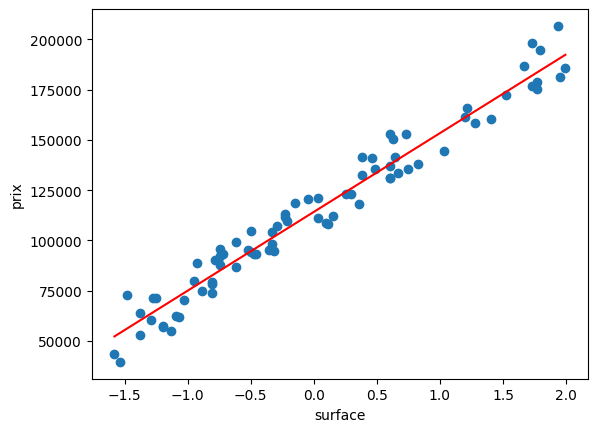

In [13]:
# visualisation du modele de base
plt.scatter(df["surface"].values, df["prix"].values)

# droite de regression
x_line = np.linspace(df["surface"].min(), df["surface"].max(), 100)

X_line = np.zeros((100, 4))
X_line[:,0] = x_line
X_line[:,1] = df["chambres"].mean()
X_line[:,2] = df["age"].mean()
X_line[:,3] = 1

y_line = X_line @ w

plt.plot(x_line, y_line, "red")

plt.xlabel("surface")
plt.ylabel("prix")
plt.show()

In [14]:
# predictions
A = np.array([[200, 3, 20],
              [300, 4, 15]])

predict = np.c_[A, np.ones(A.shape[0])] @ w
print("predictions:", predict)

predictions: [ 7914814.71745364 11851161.10873092]
